In [59]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
print(cv2.__version__)

# jupyter notebookの場合はmatplotlibのインライン表示を有効にする
%matplotlib inline

4.11.0


## スライダーのテスト

In [13]:
def test_slider(x):
    print(f'スライダーの値: {x}')

interact(test_slider, x=IntSlider(min=0, max=100, step=1, value=50))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.test_slider(x)>

## 画像の読み込み

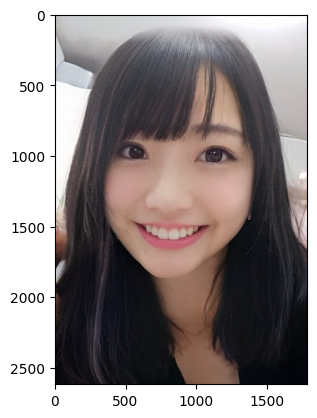

In [5]:
img = cv2.imread("./shining.jpg")

# GBRの順番になっているので、matplotlibで表示するためにはRGBの順番にする必要がある
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 画像サイズの変更

In [ ]:
img = cv2.imread("./shining.jpg")
def change_size_slider(x, y):
    img_50_50 = cv2.resize(img, (x, y))
    # 画像の表示
    plt.imshow(cv2.cvtColor(img_50_50, cv2.COLOR_BGR2RGB))
    plt.show()

interact(change_size_slider, x=IntSlider(min=1, max=100, step=1, value=50),
         y=IntSlider(min=1, max=100, step=1, value=50))

interactive(children=(IntSlider(value=50, description='x', min=1), IntSlider(value=50, description='y', min=1)…

<function __main__.change_size_slider(x, y)>

## 画像のクロップ

In [28]:
img = cv2.imread("./shining.jpg")
width = img.shape[1]
height = img.shape[0]


def crop_image_slider(x1, y1, x2, y2):
    # 画像のスライスを使って画像の一部を切り出す
    img_croped = img[y1:y2, x1:x2]
    # 画像の表示
    plt.imshow(cv2.cvtColor(img_croped, cv2.COLOR_BGR2RGB))
    plt.show()


interact(crop_image_slider,
         x1=IntSlider(min=0, max=width, step=1, value=0),
         y1=IntSlider(min=0, max=height, step=1, value=0),
         x2=IntSlider(min=0, max=width, step=1, value=width),
         y2=IntSlider(min=0, max=height, step=1, value=height)
         )

interactive(children=(IntSlider(value=0, description='x1', max=1787), IntSlider(value=0, description='y1', max…

<function __main__.crop_image_slider(x1, y1, x2, y2)>

## 画像をぼかす

In [ ]:
img = cv2.imread("./shining.jpg")

def blur_image_slider(kernel_size):
    # カーネル(ピクセルの平均化)で画像をぼかす    
    img_blur = cv2.blur(img, (kernel_size, kernel_size))
    # 画像の表示
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.show()

interact(blur_image_slider,
         kernel_size=IntSlider(min=1, max=1000, step=1, value=5)
         )

interactive(children=(IntSlider(value=5, description='kernel_size', max=1000, min=1), Output()), _dom_classes=…

<function __main__.blur_image_slider(kernel_size)>

## 画像をくっきりさせる

In [31]:
img = cv2.imread("./shining.jpg")


def sharp_image_slider(kernel_value):
    # ピクセルを際立たせるカーネルでくっきりさせる
    kernel = np.array([[0, -1, 0], [-1, kernel_value, -1], [0, -1, 0]])
    img_sharp = cv2.filter2D(img, -1, kernel)

    # 画像の表示
    plt.imshow(cv2.cvtColor(img_sharp, cv2.COLOR_BGR2RGB))
    plt.show()


interact(sharp_image_slider,
         kernel_value=IntSlider(min=1, max=100, step=1, value=5)
         )

interactive(children=(IntSlider(value=5, description='kernel_value', min=1), Output()), _dom_classes=('widget-…

<function __main__.sharp_image_slider(kernel_value)>

## コントラストの強調(ヒストグラム平坦化)

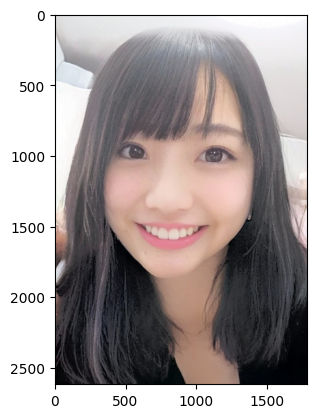

In [32]:
img_bgr = cv2.imread("./shining.jpg")

# YUVに変換
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

# 画像を強調(ヒストグラム均等化)
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

# RGBに変換
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# 画像の表示
plt.imshow(img_rgb)
plt.show()

## 画像の単純な2値化

In [ ]:
# 画像をグレースケールで読み込み
img_gray = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)


def threshold_img_slider(threshold):
    # 画像を2値化(閾値127で分割)
    img_binary = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)[1]
    # 画像の表示
    plt.imshow(img_binary, cmap="gray"), plt.axis("off")
    plt.show()


interact(threshold_img_slider,
         threshold=IntSlider(min=0, max=255, step=1, value=127)
         )

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

<function __main__.threshold_img_slider(threshold)>

## 画像の2値化(適応的閾値処理)

In [ ]:
# 画像をグレースケールで読み込み
img_gray = cv2.imread("./shining.jpg", cv2.IMREAD_GRAYSCALE)
MAX_OUTPUT_VALUE = 255  # 出力するピクセルの最大値


def adaptive_threshold_img_slider(neighborhood_size, subtract_from_mean):
    '''画像を適応的に二値化する関数
    neighborhood_size: 閾値計算に使用するピクセルの数(奇数を指定する)
    subtract_from_mean: 計算された閾値から引く値
    '''
    # 適応的閾値処理を行う
    img_adapt = cv2.adaptiveThreshold(
        img_gray,
        MAX_OUTPUT_VALUE,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # ピクセルごとに閾値を計算
        cv2.THRESH_BINARY,  # 二値化処理
        neighborhood_size,
        subtract_from_mean,
    )
    # 画像の表示
    plt.imshow(img_adapt, cmap="gray"), plt.axis("off")
    plt.show()


interact(adaptive_threshold_img_slider,
         neighborhood_size=IntSlider(min=3, max=100, step=2, value=11),
         subtract_from_mean=IntSlider(min=0, max=20, step=1, value=2)
         )

interactive(children=(IntSlider(value=11, description='neighborhood_size', min=3, step=2), IntSlider(value=2, …

<function __main__.adaptive_threshold_img_slider(neighborhood_size, subtract_from_mean)>

## エッジの検出

In [ ]:
img_bgr = cv2.imread("./shining.jpg")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


def edge_detection_img_slider(lower_threshold, upper_threshold):
    # エッジ検出を行う
    edges = cv2.Canny(img_gray, lower_threshold, upper_threshold)
    img_bgr_copy = img_bgr.copy()
    img_bgr_copy[edges != 0] = [0, 255, 0]  # エッジの部分を緑色にする
    # 画像の表示
    img_rgb = cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb), plt.axis("off")
    plt.show()


# 輝度の中央値を計算
median_intensity = np.median(img_gray)
# 中央値の0.67倍と1.33倍の輝度に振り分ける
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

interact(edge_detection_img_slider,
         lower_threshold=IntSlider(
             min=0, max=255, step=1, value=lower_threshold),
         upper_threshold=IntSlider(
             min=0, max=255, step=1, value=upper_threshold)
         )

interactive(children=(IntSlider(value=55, description='lower_threshold', max=255), IntSlider(value=110, descri…

<function __main__.edge_detection_img_slider(lower_threshold, upper_threshold)>

## コーナーの検出

In [80]:
img_bgr = cv2.imread("./shining.jpg")
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


def detect_corner_img_slider(block_size, filter_size, free_parameter, threshold):
    """ コーナー検出
    block_size: コーナー検出に使用するブロックのサイズ
    filter_size: Sobelフィルタのサイズ
    free_parameter: コーナー検出の自由度
    threshold: コーナー検出のしきい値
    """
    # コーナー検出を行う
    corners = cv2.cornerHarris(img_gray, block_size, filter_size, free_parameter)
    detector_corners = cv2.dilate(corners, None) # コーナー部分を強調する
    
    # 検出したコーナーがしきい値以上の値を持つピクセルを緑で塗る
    img_bgr_copy = img_bgr.copy()
    img_bgr_copy[detector_corners > threshold *
            detector_corners.max()] = [0, 255, 0]
    # BGRからRGBに変換して画像を表示
    img_rgb = cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb), plt.axis("off")
    plt.show()


interact(detect_corner_img_slider,
         block_size=IntSlider(min=2, max=100, step=1, value=2),
         filter_size=IntSlider(min=1, max=11, step=2, value=3),
         free_parameter=FloatSlider(
             min=0.01, max=0.1, step=0.01, value=0.04, readout_format='.2f'),
         threshold=FloatSlider(min=0.0000, max=1.0000, step=0.0001, value=0.1000, readout_format='.4f')
         )

interactive(children=(IntSlider(value=2, description='block_size', min=2), IntSlider(value=3, description='fil…

<function __main__.detect_corner_img_slider(block_size, filter_size, free_parameter, threshold)>

## 色のヒストグラム

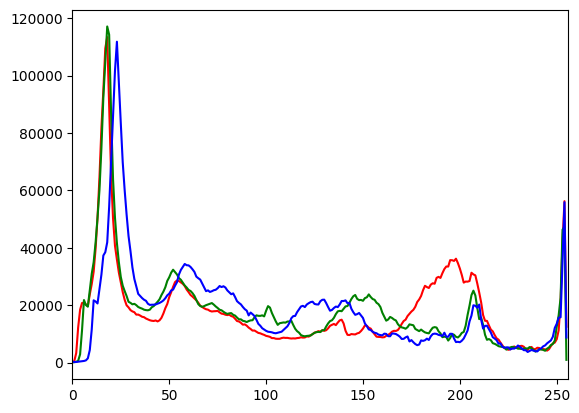

In [40]:
img_bgr = cv2.imread("./shining.jpg")

# RGBに変換
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 特徴量を格納するリストを作成
features = []

# それぞれの色のチャンネルを定義
colors = ("r", "g", "b")

# それぞれのチャンネルについてヒストグラムを計算
for i, channel in enumerate(colors):
    histogram = cv2.calcHist(
        [img_rgb],  # 画像
        [i],  # チャンネルインデックス
        None,  # マスクは使用しない
        [256],  # ヒストグラムの大きさ
        [0, 256],  # 範囲
    )
    features.extend(histogram)

    plt.plot(histogram, color=channel)
plt.xlim([0, 256])
plt.show()

## 色の分離

In [ ]:
img_bgr = cv2.imread("./shining.jpg")
# HSVに変換
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)


def sepalate_color_slider(lower_hue, lower_saturation, lower_brightness,
                          upper_hue, upper_saturation, upper_brightness):
    # HSV空間で「色」の範囲を定義
    lower_white = np.array([lower_hue, lower_saturation, lower_brightness])
    upper_white = np.array([upper_hue, upper_saturation, upper_brightness])
    # 白以外の部分を黒にするマスクを作成
    img_mask = cv2.inRange(img_hsv, lower_white, upper_white)
    # 画像にマスクを適用
    img_bgr_masked = cv2.bitwise_and(img_bgr, img_bgr, mask=img_mask)
    # 画像の表示
    plt.imshow(cv2.cvtColor(img_bgr_masked, cv2.COLOR_BGR2RGB))
    plt.show()


interact(sepalate_color_slider,
         lower_hue=IntSlider(min=0, max=255, step=1, value=0),
         lower_saturation=IntSlider(min=0, max=255, step=1, value=0),
         lower_brightness=IntSlider(min=0, max=255, step=1, value=0),
         upper_hue=IntSlider(min=0, max=255, step=1, value=255),
         upper_saturation=IntSlider(min=0, max=255, step=1, value=255),
         upper_brightness=IntSlider(min=0, max=255, step=1, value=255)
         )

interactive(children=(IntSlider(value=0, description='lower_hue', max=255), IntSlider(value=0, description='lo…

<function __main__.sepalate_color_slider(lower_hue, lower_saturation, lower_brightness, upper_hue, upper_saturation, upper_brightness)>